# Notebook 3: Explicabilité et Interprétabilité des Modèles

**Auteurs:**  

Akram Farihi, Sami Abloui, Amalya Mourih 


**Objectifs de notebook:**

Dans ce notebook, nous réalisons l’exploration ce jeux des données. 
L’objectif est de comprendre la structure des données, identifier les variables pertinentes et observer les relations entre les attributs.


In [1]:
# Imports
from sys import path
import matplotlib.pyplot as plt

path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.explainability.exp_utils import calculate_probas
from src.explainability.exp_utils import create_shap_explainer
from src.explainability.exp_utils import calculate_shap_values
import mlflow
import shap
print("Les bibliothèques sont importées avec succès.")

Les bibliothèques sont importées avec succès.


Nous chargeons maintenant les données prétraitées. 

In [2]:
# 1. Charger les quatre fichiers CSV
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

Afin d'analyser l'explicabilité du modèle de manière équilibrée, nous sélectionnons des échantillons représentatifs de chaque classe de qualité de sommeil (Poor, Fair, Good, Excellent) dans l'ensemble de test. Cette approche permet d'obtenir des visualisations SHAP cohérentes et comparables entre les différentes classes.

In [3]:
indices = []
idxs = []
for j in range(4):
    for i in range (y_test.shape[0]):
        if (y_test.iloc[i, 0] == j):
            if(len(idxs) < 10):
                idxs.append(i)
            else:
                break
    indices = idxs + indices

print(indices)

[5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57]


Poursuivons par le téléchargements des models enregistrées sur nos fichiers. 

In [4]:
# MODIFIER LE CHEMIN EN FONCTION D'OU SE TROUVE LE FICHIER

#model_path = "../mlruns/521135279030385865/models/m-2b205e7bd12c49d3b5aa81be5d58b233/artifacts" 
model_path = "../mlruns/131356603480576134/models/m-098f1991ca7c4c3a88e672d05fb7946a/artifacts"

# Check available models
import glob
available_models = glob.glob("../mlruns/131356603480576134/models/*/artifacts/*.pkl")
print("Available models:")
for model in available_models:
    print(f" - {model}")

model = mlflow.sklearn.load_model(model_path)

print(f"\n Model loaded from: {model_path}")

Available models:
 - ../mlruns/131356603480576134/models\m-098f1991ca7c4c3a88e672d05fb7946a\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-4b85cd1634614c09b7c1847449e7fa2a\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-58a11712c248456cae1d0110e7c70c6c\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-6c9e49dba9c14563b1f182184818a8da\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-89949cf7781e4096bdea1ef656561f27\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-94f895123cb24aa2abdad3c4cab33f33\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-aa2c7ef151564e6a9f2daf5c9915e3c4\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-c9c1135cacb845638e0df728edb9a89d\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-d43d10286f9e475c8915a8736885303f\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-ece089a5b93b445dbe1798fd99040f79\artifacts\model.pkl
 - ../mlruns/131356603480576134/models\m-f

In [5]:
X_test.head()

Gender  Coffee_Intake  Caffeine_mg  Sleep_Hours   BMI  Heart_Rate  \
0       1            3.3        314.7          7.6  23.2          64   
1       0            6.3        596.3          7.6  32.0          63   
2       0            2.1        202.0          8.1  25.4          66   
3       1            3.4        319.1          7.0  29.4          80   
4       1            3.1        297.1          6.4  18.8          71   

   Stress_Level  Physical_Activity_Hours  Health_Issues  Occupation  Smoking  \
0             0                      5.5              0           1        1   
1             0                     10.8              1           1        1   
2             0                      5.4              0           3        0   
3             0                      4.4              0           4        0   
4             0                     12.0              0           4        0   

   Alcohol_Consumption  Age_Group  Continent  
0                    0          1          3  
1                    0          1          1  
2                    0          2          4  
3                    0          2          1  
4                    0          1          4

In [6]:
predict_fn = lambda X: calculate_probas(model, X)[1]

# 1. Création de l'explainer
explainer_shap = create_shap_explainer(
    predict_fn=predict_fn, 
    data=X_train 
) 

# 2. Calcul des valeurs SHAP
shap_values = calculate_shap_values(explainer_shap, X_test.iloc[indices])

PermutationExplainer explainer: 41it [00:21,  1.32it/s]                        


C:\Users\amaly\AppData\Local\Temp\ipykernel_5440\3397424894.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


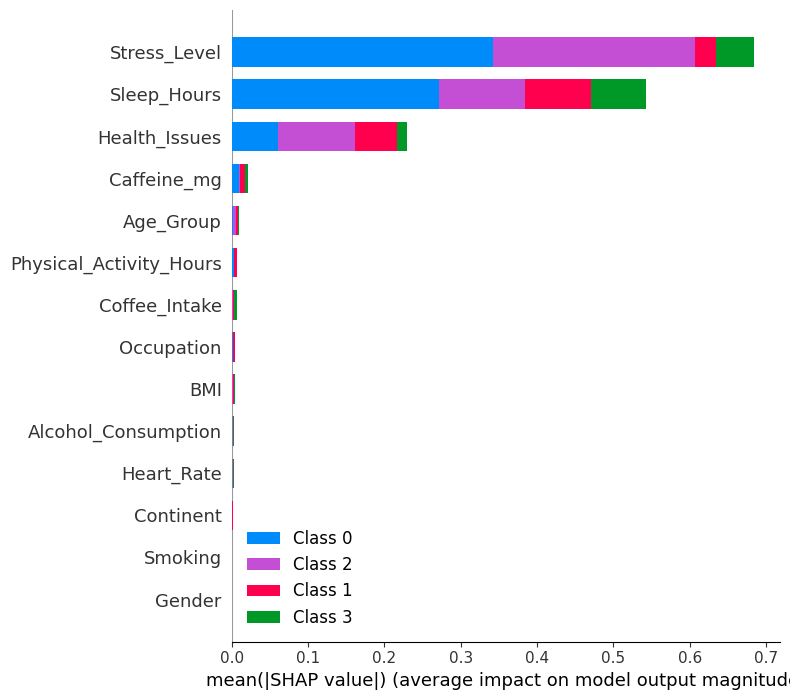

In [7]:
shap.summary_plot(
    shap_values, # On prend toutes les samples, toutes les features, pour la classe 2
    X_test.iloc[indices], 
    show=False # Pour éviter l'affichage dans certaines environnements
)

C:\Users\amaly\AppData\Local\Temp\ipykernel_5440\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


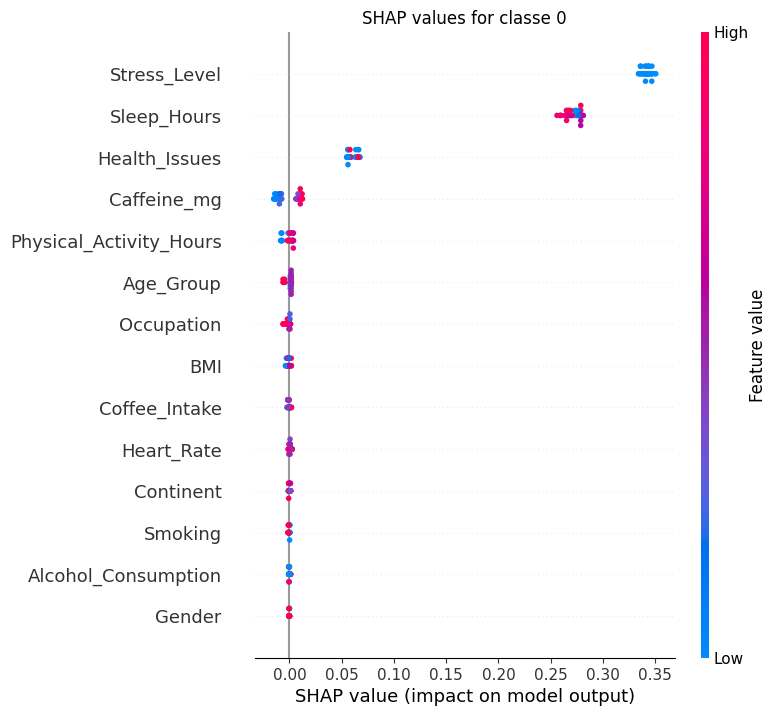

C:\Users\amaly\AppData\Local\Temp\ipykernel_5440\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


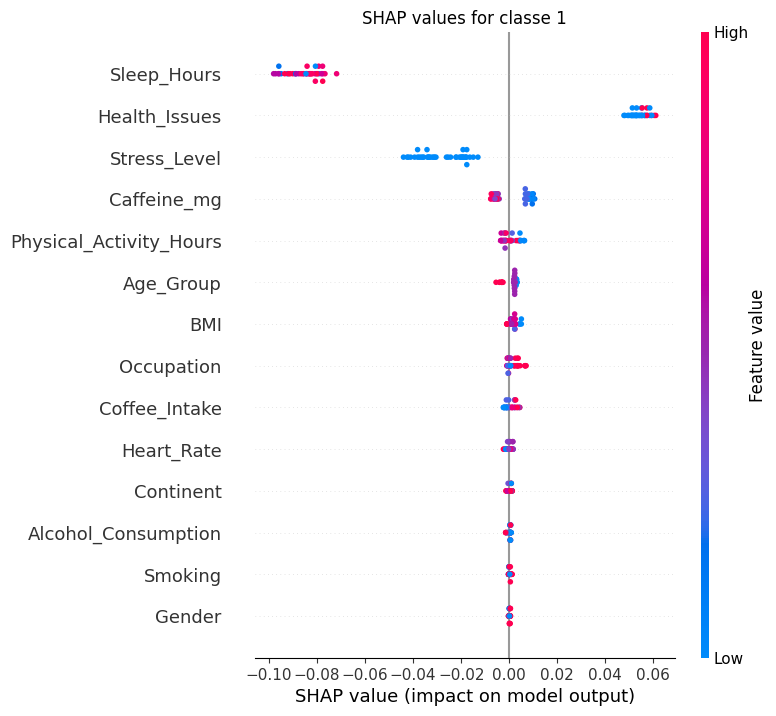

C:\Users\amaly\AppData\Local\Temp\ipykernel_5440\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


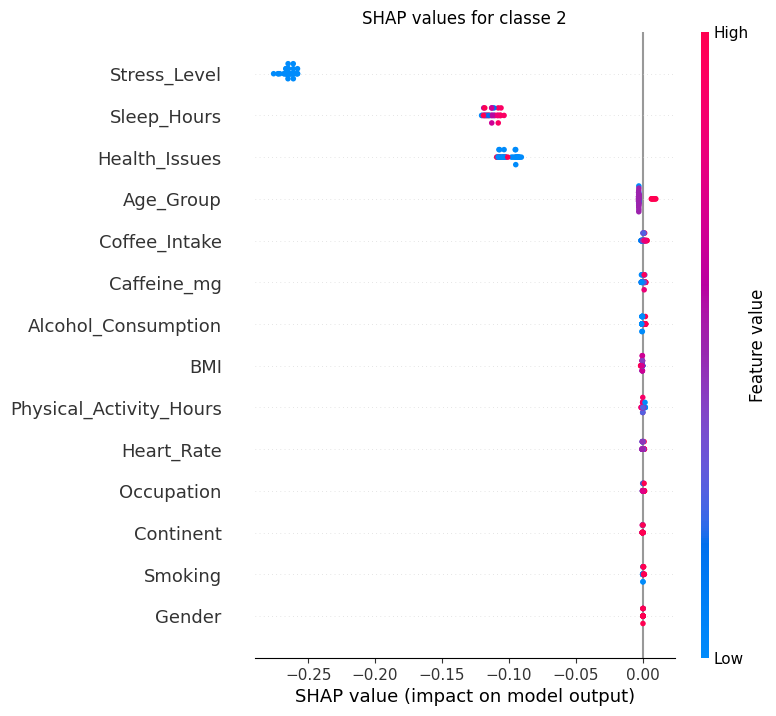

C:\Users\amaly\AppData\Local\Temp\ipykernel_5440\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


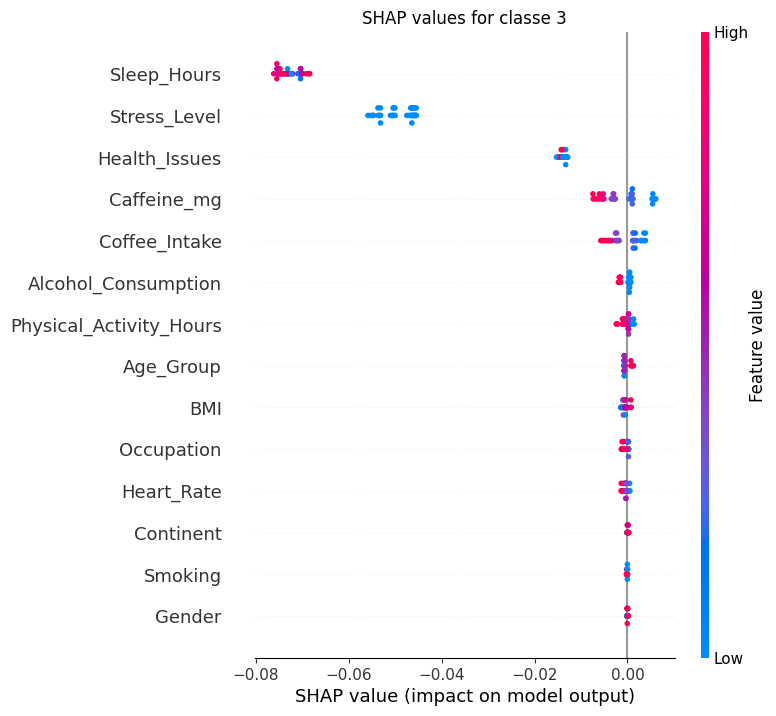

In [8]:

for i in range(4):
    # 1. Utilise shap.summary_plot sans l'argument 'title'
    shap.summary_plot(
        shap_values[:, :, i],
        X_test.iloc[indices],
        show=False # On empêche l'affichage immédiat
    )
    
    # 2. Ajoute le titre en utilisant Matplotlib
    plt.title(f"SHAP values for classe {i}")
    
    # 3. Affiche la figure
    plt.show()

In [9]:
# Imports
from sys import path

path.append('..')

from src.explainability.exp_utils import LimeTabularExplainer
from src.explainability.exp_utils import explain_instance_for_single_raw
from src.explainability.exp_utils import separe_classes
from src.explainability.exp_utils import explain_instance_for_each_classe
from src.explainability.exp_utils import visualisation_lime

In [10]:
explainer = LimeTabularExplainer(X_train)

In [11]:
sample = X_test.iloc[10]
result_for_single_row = explain_instance_for_single_raw(explainer , sample, predict_fn)

c:\Users\amaly\OneDrive\Bureau\Amu M2\Apprentissage automatique pour DS\pd\Processus_data\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\amaly\OneDrive\Bureau\Amu M2\Apprentissage automatique pour DS\pd\Processus_data\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\amaly\OneDrive\Bureau\Amu M2\Apprentissage automatique pour DS\pd\Processus_data\.venv\Lib\site-packages\lime\lime_tabular.py:544:

In [12]:
print(result_for_single_row.as_list())

[('0.00 < Stress_Level <= 1.00', 0.40744242420942467), ('Sleep_Hours <= 5.80', 0.15757846265721315), ('0.00 < Health_Issues <= 1.00', 0.12076133567196971), ('Smoking <= 0.00', 0.007203528066855933), ('Heart_Rate > 77.00', 0.005512355188572101), ('BMI <= 21.30', 0.00516524805043762), ('Alcohol_Consumption <= 0.00', 0.004784873433770957), ('1.50 < Coffee_Intake <= 2.50', -0.00446448273150264), ('1.00 < Age_Group <= 2.00', 0.003346063937075264), ('2.00 < Continent <= 4.00', -0.00309100433407474)]


In [13]:
grouped_indices = separe_classes(y_test)
print(grouped_indices)

{np.int64(0): array([   5,   11,   12,   14,   24,   25,   27,   36,   37,   57,   80,
         83,   87,   93,  129,  151,  168,  169,  180,  196,  218,  220,
        226,  238,  252,  257,  264,  287,  296,  297,  305,  316,  337,
        348,  368,  370,  383,  397,  402,  406,  450,  451,  463,  470,
        474,  477,  480,  517,  541,  553,  559,  587,  592,  616,  618,
        619,  629,  631,  651,  669,  670,  672,  677,  683,  719,  721,
        726,  732,  737,  740,  742,  756,  765,  781,  785,  786,  795,
        818,  822,  836,  837,  841,  846,  857,  870,  874,  890,  903,
        925,  945,  947,  956,  969,  982,  997, 1006, 1032, 1035, 1038,
       1043, 1051, 1072, 1119, 1129, 1139, 1153, 1161, 1173, 1179, 1193,
       1219, 1236, 1239, 1247, 1251, 1252, 1257, 1259, 1287, 1288, 1292,
       1296, 1312, 1321, 1324, 1335, 1355, 1361, 1383, 1391, 1410, 1424,
       1427, 1448, 1451, 1461, 1463, 1468, 1479, 1484, 1487, 1488, 1492,
       1495, 1496, 1514, 1520, 1527, 

In [14]:

list_of_index_arrays = list(grouped_indices.values())


lime_0 = explain_instance_for_each_classe(
    list_of_index_arrays[0], 
    X_test , 
    y_test, 
    explainer , 
    predict_fn 
)


lime_1 = explain_instance_for_each_classe(
    list_of_index_arrays[1], 
    X_test, 
    y_test, 
    explainer , 
    predict_fn 
)

lime_2 = explain_instance_for_each_classe(
    list_of_index_arrays[2], 
    X_test , 
    y_test, 
    explainer , 
    predict_fn 
)

lime_3 = explain_instance_for_each_classe(
    list_of_index_arrays[3], 
    X_test , 
    y_test, 
    explainer , 
    predict_fn 
)

c:\Users\amaly\OneDrive\Bureau\Amu M2\Apprentissage automatique pour DS\pd\Processus_data\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\amaly\OneDrive\Bureau\Amu M2\Apprentissage automatique pour DS\pd\Processus_data\.venv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\amaly\OneDrive\Bureau\Amu M2\Apprentissage automatique pour DS\pd\Processus_data\.venv\Lib\site-packages\lime\lime_tabular.py:544:

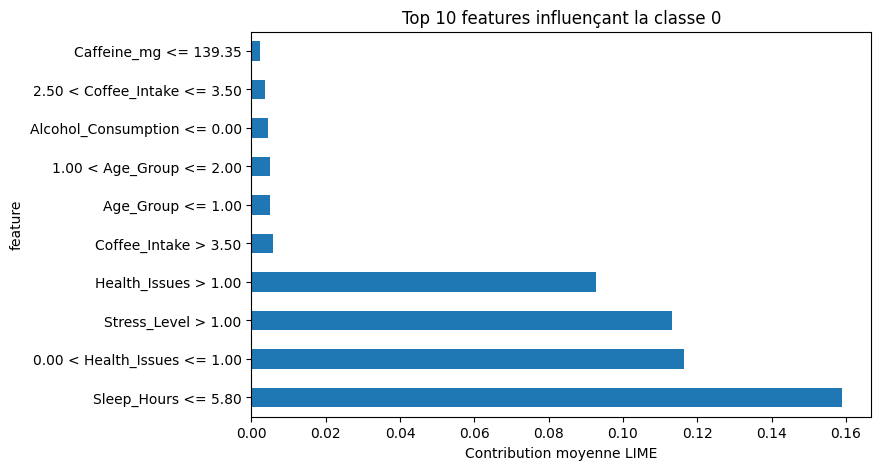

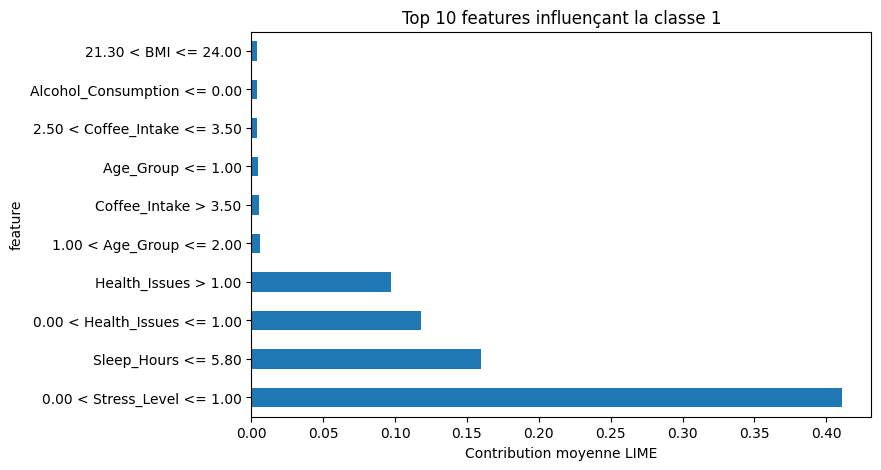

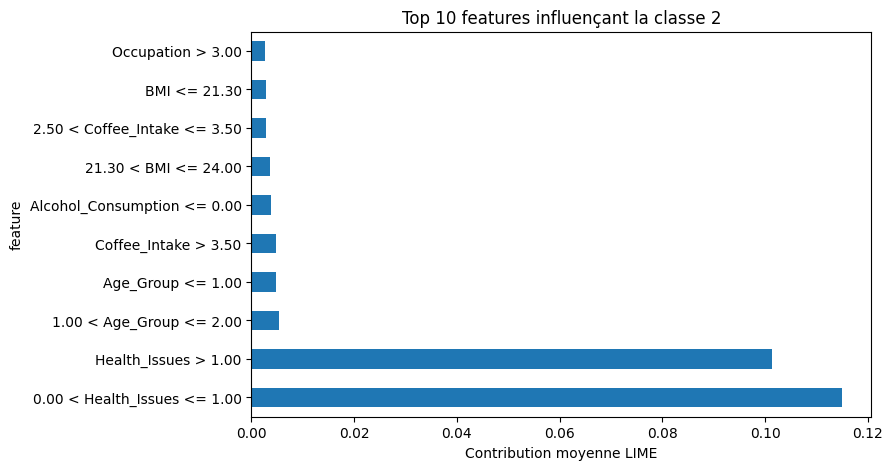

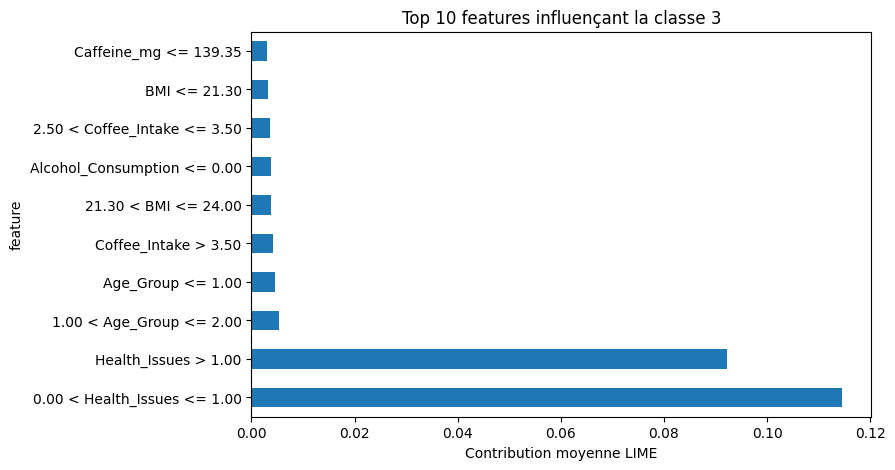

In [15]:
visualisation_lime(lime_0 , 0)
visualisation_lime(lime_1 ,1)
visualisation_lime(lime_2 , 2)
visualisation_lime(lime_3 , 3)